In [61]:
import pandas as pd
import time
from datetime import date
from datetime import datetime
from matplotlib.finance import quotes_historical_yahoo_ochl
import matplotlib.pyplot as plt

### Load data for Microsoft and Intel

In [26]:
start = datetime(2014,1,1)
end = datetime(2014,12,31)
quotesMSFT = quotes_historical_yahoo_ochl('MSFT', start, end) # get stock prices of Microsoft
quotesINTC = quotes_historical_yahoo_ochl('INTC', start, end) # get stock prices of Intel
#print quotesMSFT 

### Process data for Microsoft

In [29]:
# get the date and transfer them into datatime datatype
date1 = []
for i in xrange(len(quotesMSFT)):
    x = date.fromordinal(int(quotesMSFT[i][0]))
    y = datetime.strftime(x,'%Y-%m-%d')
    date1.append(y)

In [31]:
month1 = []
for i in xrange(len(quotesmsftdf)):
    temp = time.strptime(quotesmsftdf.index[i],"%Y-%m-%d")
    month1.append(temp.tm_mon)
#print month1

In [39]:
fields = ['Date', 'Open', 'Close','High', 'Low','Volume']

In [41]:
quotesmsftdf = pd.DataFrame(quotesMSFT, index=date1, columns=fields)
quotesmsftdf = quotesmsftdf.drop(['Date'], axis = 1) 
quotesmsftdf.head(5)  

,Open,Close,High,Low,Volume
2014-01-02,34.238272,34.064103,34.284110,34.009100,30632200.0
2014-01-03,34.100771,33.834931,34.119105,33.550756,31134800.0
2014-01-06,33.779928,33.119916,33.816597,33.101582,43603700.0
2014-01-07,33.303254,33.376587,33.449924,33.193249,35802800.0
2014-01-08,33.000746,32.780739,33.129081,32.615739,59971700.0


In [48]:
quotesmsftdf['Month'] = month1
closemaxMSFT = quotesmsftdf.groupby('Month').max().Close
closemaxMSFT

pandas.core.series.Series

### Process data for Intel

In [51]:
date2 = []
for i in xrange(len(quotesINTC)):
    x = date.fromordinal(int(quotesINTC[i][0]))
    y = datetime.strftime(x,'%Y-%m-%d')
    date2.append(y)

In [54]:
month2 = []
for i in xrange(len(quotesmsftdf)):
    temp = time.strptime(quotesmsftdf.index[i],"%Y-%m-%d")
    month2.append(temp.tm_mon)

In [52]:
quotesintcdf = pd.DataFrame(quotesINTC, index = date2, columns = fields)
quotesintcdf = quotesintcdf.drop(['Date'], axis = 1)
quotesintcdf.head(5)

,Open,Close,High,Low,Volume
2014-01-02,23.316708,23.325752,23.352885,23.036326,31833300.0
2014-01-03,23.389064,23.316708,23.425241,23.153906,27796700.0
2014-01-06,23.307662,23.027282,23.325752,23.018239,28682300.0
2014-01-07,23.099640,23.144862,23.271485,23.036327,19665100.0
2014-01-08,23.190083,23.000150,23.253395,22.882571,29680500.0


In [55]:
quotesintcdf['Month'] = month2
closemaxINTC = quotesintcdf.groupby('Month').max().Close
closemaxINTC

Month
1     24.121667
2     22.644239
3     23.566444
4     24.689527
5     25.159533
6     28.484054
7     32.038806
8     32.585662
9     32.752531
10    31.769861
11    34.758883
12    35.150793
Name: Close, dtype: float64

### Plot a diagram comparing the stock price trend in 2004 for these two cmpanies

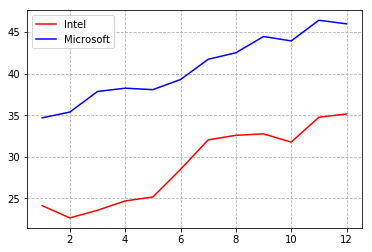

In [72]:
fig, ax = plt.subplots()
ax.plot(closemaxINTC, 'r-', label = 'Intel')
ax.plot(closemaxMSFT, 'b-', label = 'Microsoft')
ax.set_xlabel = 'Month'
ax.set_ylabel = 'Monthly Max Close Price'
ax.legend()
ax.grid(linestyle = '--')

plt.show()